In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

### 1. We have the min and max temperatures in a city In India for each months of the year.
### We would like to find a function to describe this and show it graphically, the dataset
### given below.
### Task:
### 1.fitting it to the periodic function
### 2.plot the fit
### Data
### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [115]:
temp_max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]

In [116]:
temp_min=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [123]:
month=np.arange(12)

Text(0, 0.5, 'Temperature(*c)')

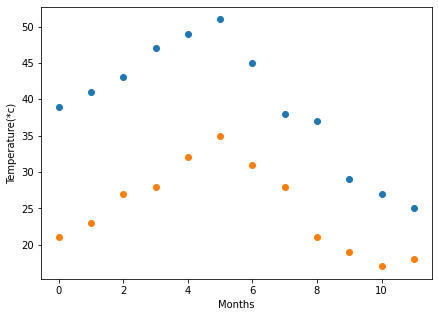

In [124]:
plt.figure(figsize=(7,5))
plt.scatter(month,temp_max)
plt.scatter(month,temp_min)
plt.xlabel('Months')
plt.ylabel('Temperature(*c)')

In [125]:

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      temp_min, [-40, 20, 0])

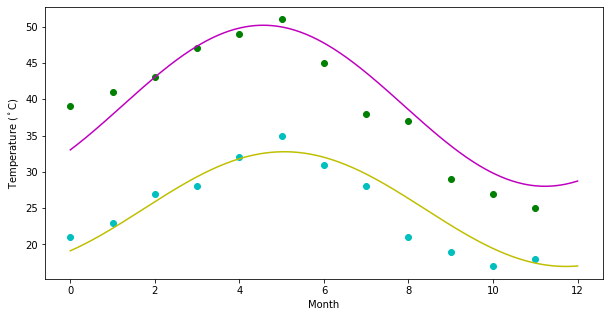

In [126]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(10,5))
plt.plot(month, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(month, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Matplotlib:
### This assignment is for visualization using matplotlib:

In [39]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [40]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [102]:
np.where(titanic['sex'].isnull())


(array([1309], dtype=int64),)

In [108]:
titanic['sex'].isnull().sum()

0

In [107]:
titanic['sex'][1309] = 'female'

<ipython-input-107-01132d09db5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'][1309] = 'female'


### 1. Create a pie chart presenting the male/female proportion

In [57]:
x=titanic['sex']
labels= 'Male','Female'
d=x.value_counts()
print(d)
x=list(d)
print(x)

male      843
female    466
Name: sex, dtype: int64
[843, 466]


([<matplotlib.patches.Wedge at 0x19249b58880>,
 [Text(-0.524549206046674, 1.079281302736133, 'Male'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female')],
 [Text(-0.30598703686055984, 0.6295807599294108, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

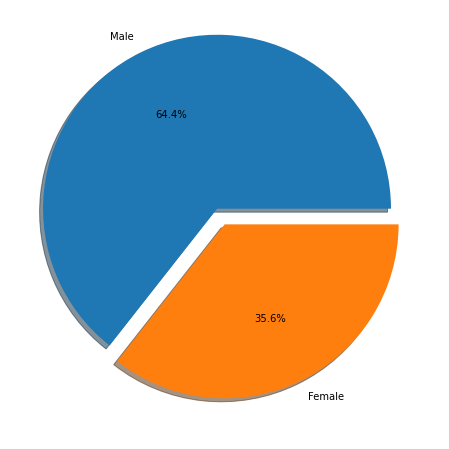

In [64]:
explode = (0.1, 0)
plt.figure(figsize=(8,8))
plt.pie(x,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True)

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0.5, 1.0, 'Fare vs Age')

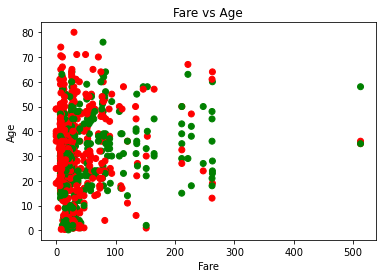

In [111]:
colors = {'male':'red', 'female':'green'}
plt.scatter(titanic['fare'],titanic['age'],c=titanic['sex'].map(colors))
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare vs Age')